In [1]:
# Exploración dataset K2
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración visual moderna
sns.set_theme(style="whitegrid", context="notebook", rc={"figure.figsize": (8,4)})

# Ruta del dataset filtrado de K2
DATA_PATH = "../FilteredData/K2_All_Filtrated.csv"
k2 = pd.read_csv(DATA_PATH)

print("Dimensiones:", k2.shape)
print("\nColumnas:")
print(k2.columns.tolist())

# Primeras filas
display(k2.head())

Dimensiones: (4004, 13)

Columnas:
['pl_orbper', 'pl_trandur', 'pl_trandep', 'pl_rade', 'pl_radj', 'st_rad', 'st_teff', 'st_mass', 'st_logg', 'st_met', 'sy_pnum', 'sy_snum', 'disposition']


,pl_orbper,pl_trandur,pl_trandep,pl_rade,pl_radj,st_rad,st_teff,st_mass,st_logg,st_met,sy_pnum,sy_snum,disposition
0,41.688644,4.544440,0.370282,2.355454,0.210139,0.956122,5703.00,0.963861,4.38000,-0.06,1.0,1.0,CONFIRMED
1,41.685500,3.656261,0.527423,2.230000,0.198947,0.928000,5766.00,0.961000,4.50000,-0.15,1.0,1.0,CONFIRMED
2,41.685500,-14.087965,0.049000,2.578070,0.230000,1.080000,5766.00,1.670000,4.50000,-0.15,1.0,1.0,CONFIRMED
3,2.301830,1.900800,2.268000,1.120000,0.099900,0.762602,4616.52,0.730000,4.53679,-0.03,0.0,1.0,CANDIDATE
4,2.302368,3.823621,3.103186,1.312588,0.120000,0.710995,4720.00,1.117612,4.50000,-0.06,0.0,1.0,CANDIDATE


/tmp/ipykernel_35191/944083596.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="disposition", data=k2, palette="Set2")


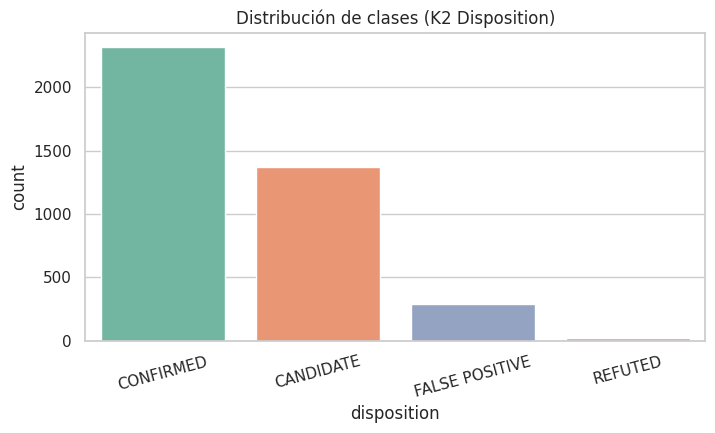

In [2]:
sns.countplot(x="disposition", data=k2, palette="Set2")
plt.title("Distribución de clases (K2 Disposition)")
plt.xticks(rotation=15)
plt.show()

/tmp/ipykernel_35191/3950028023.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disposition", y=col, data=k2, palette="coolwarm")


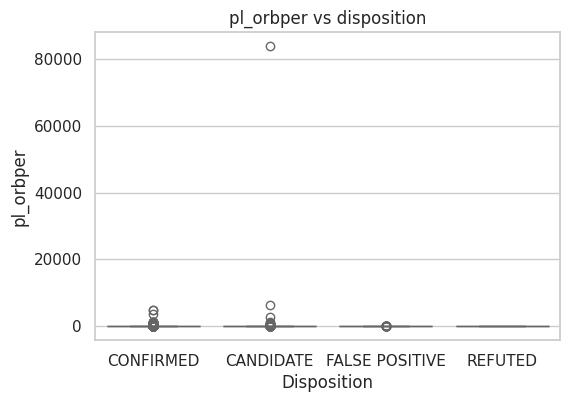

/tmp/ipykernel_35191/3950028023.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disposition", y=col, data=k2, palette="coolwarm")


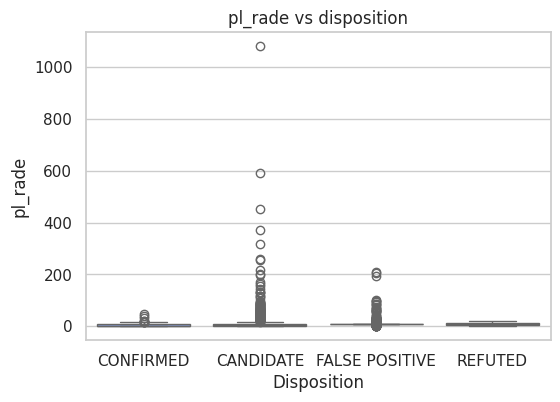

/tmp/ipykernel_35191/3950028023.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disposition", y=col, data=k2, palette="coolwarm")


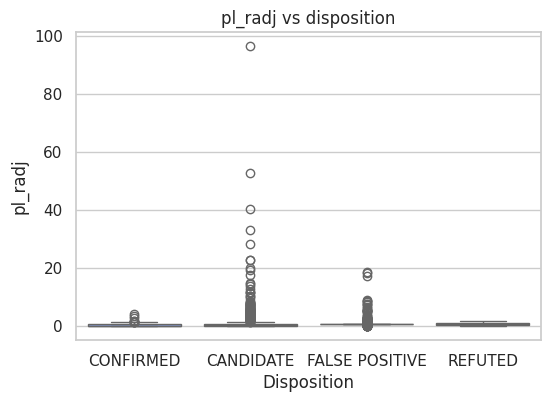

/tmp/ipykernel_35191/3950028023.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disposition", y=col, data=k2, palette="coolwarm")


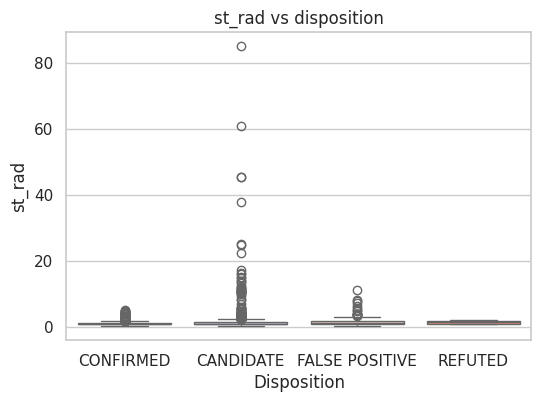

/tmp/ipykernel_35191/3950028023.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disposition", y=col, data=k2, palette="coolwarm")


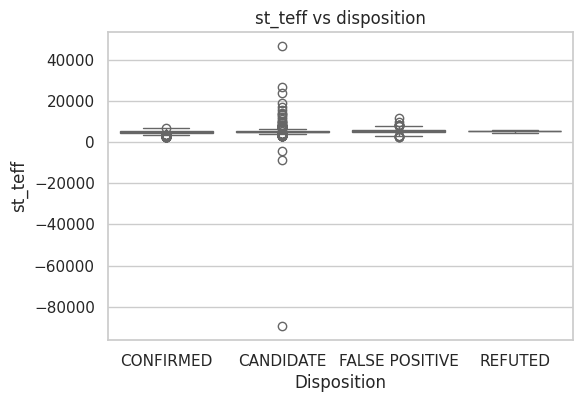

/tmp/ipykernel_35191/3950028023.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disposition", y=col, data=k2, palette="coolwarm")


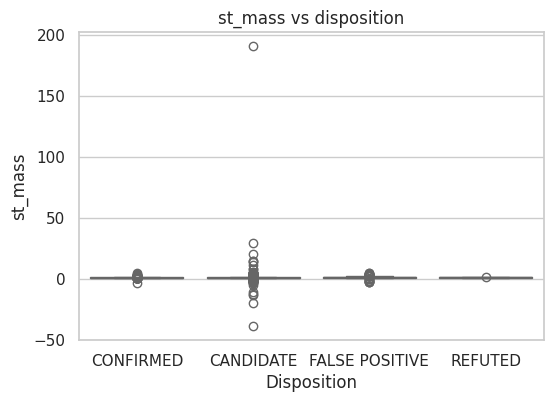

In [3]:
cols_check = ["pl_orbper", "pl_rade", "pl_radj", "st_rad", "st_teff", "st_mass"]

for col in cols_check:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="disposition", y=col, data=k2, palette="coolwarm")
    plt.title(f"{col} vs disposition")
    plt.xlabel("Disposition")
    plt.ylabel(col)
    plt.show()

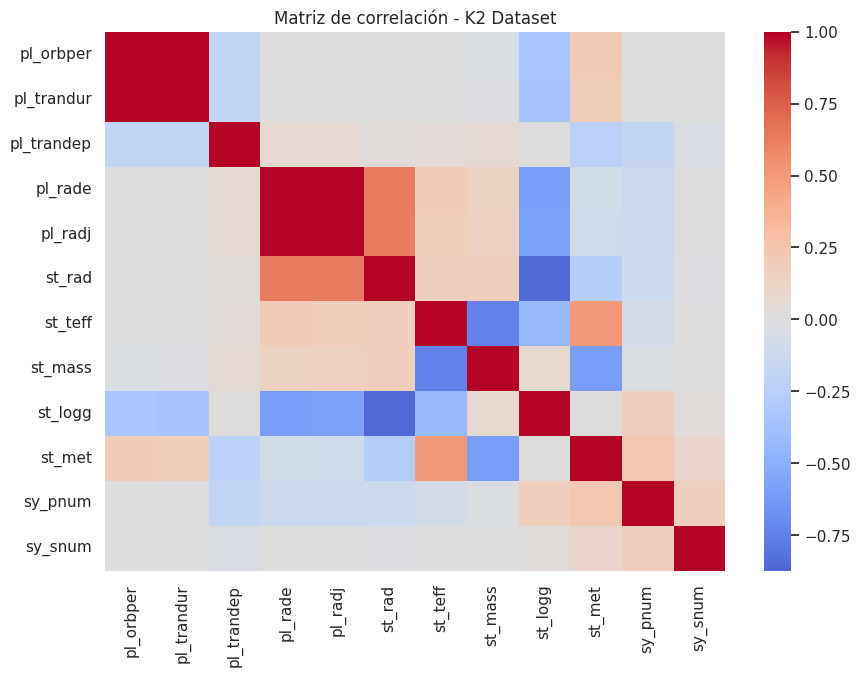

In [4]:
# Seleccionar solo columnas numéricas
X = k2.select_dtypes(include=[np.number])

plt.figure(figsize=(10,7))
sns.heatmap(X.corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Matriz de correlación - K2 Dataset")
plt.show()

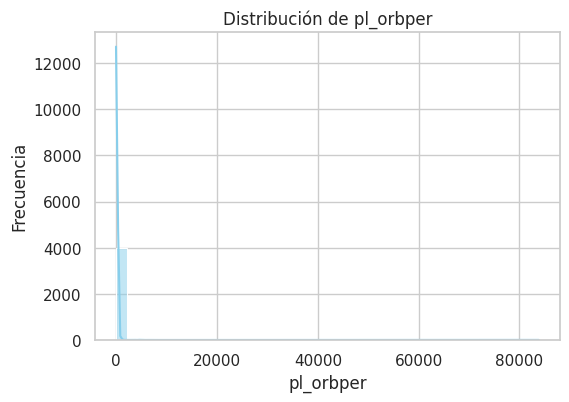

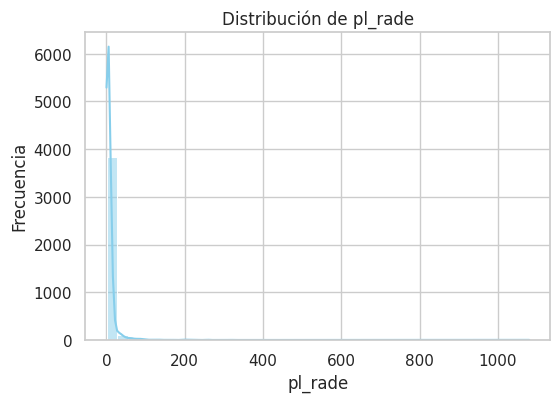

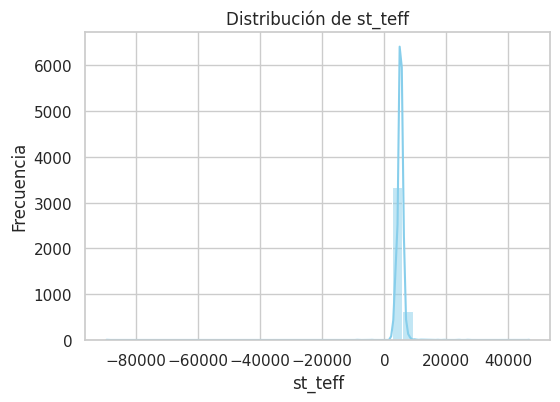

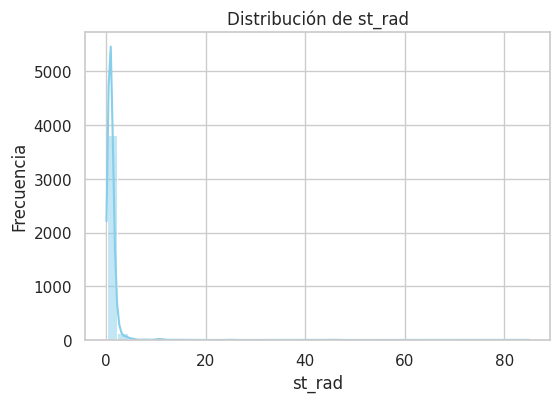

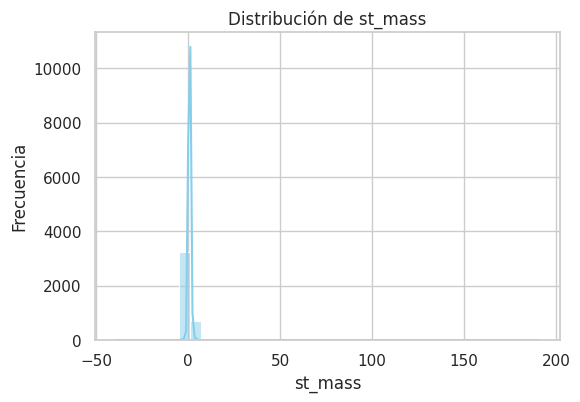

In [5]:
cols_physical = ["pl_orbper", "pl_rade", "st_teff", "st_rad", "st_mass"]

for col in cols_physical:
    plt.figure(figsize=(6,4))
    sns.histplot(k2[col], bins=40, kde=True, color="skyblue")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Copia del dataset
df_k2 = k2.copy()

# Codificar la variable objetivo (texto → número)
le = LabelEncoder()
df_k2["disposition_encoded"] = le.fit_transform(df_k2["disposition"])

# Separar features numéricos y target
X = df_k2.select_dtypes(include=[np.number]).drop(columns=["disposition_encoded"])
y = df_k2["disposition_encoded"]

# Entrenar un Random Forest rápido
rf = RandomForestClassifier(
    n_estimators=200, 
    random_state=42,
    n_jobs=-1
)
rf.fit(X, y)

# Calcular importancia de variables
importances = rf.feature_importances_
feature_names = X.columns

# Crear DataFrame ordenado
feat_imp = pd.DataFrame({
    "Variable": feature_names,
    "Importancia (%)": 100 * importances / importances.sum()
}).sort_values("Importancia (%)", ascending=False)

# Mostrar top 10
display(feat_imp.head(10))

,Variable,Importancia (%)
10,sy_pnum,52.853440
9,st_met,11.887038
2,pl_trandep,7.058590
4,pl_radj,5.702424
3,pl_rade,5.240069
0,pl_orbper,3.523512
1,pl_trandur,2.890232
5,st_rad,2.854352
6,st_teff,2.760911
8,st_logg,2.605759


/tmp/ipykernel_35191/4079057731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


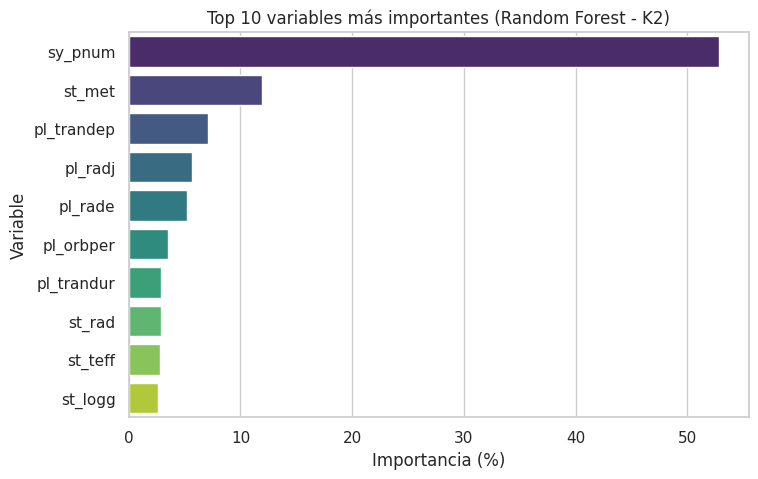

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=feat_imp.head(10),
    x="Importancia (%)",
    y="Variable",
    palette="viridis"
)
plt.title("Top 10 variables más importantes (Random Forest - K2)")
plt.xlabel("Importancia (%)")
plt.ylabel("Variable")
plt.show()